# **DATASET DE AJEDREZ**


Tu dataset corresponde a partidas de ajedrez en línea. Contiene información sobre las partidas, los jugadores, el resultado, y las aperturas utilizadas.

Donde la:

Y = Winner

X1 = white_rating (nivel del jugador con blancas)

X2 = black_rating (nivel del jugador con negras)

X3 = turns (número de jugadas totales)

X4 = rated (clasificatoria) (1 si lo es, 0 si no)

X5 = opening_ply (jugadas en la apertura)

# **IMPORTACION DE LIBRERIAS**

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# **Montar el Drive en el Cuadernillo**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Leer el dataset**

In [7]:
# Leer datos separados por una coma
# data = np.loadtxt('ex1data1.txt', delimiter=',')
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
df = pd.read_csv('/content/drive/MyDrive/Datasets/games.csv')

# 1. Filtrar solo partidas con ganador definido (quitamos draws y nulls)
df = df[df["winner"].isin(["white", "black"])]

# 2. Crear variable Y binaria (ganador)
df["Y"] = df["winner"].apply(lambda x: 1 if x == "white" else 0)

# 3. Seleccionar X (predictoras)
X = df[["white_rating", "black_rating", "turns", "rated", "opening_ply"]]

# Convertir 'rated' de booleano a int (0/1)
X["rated"] = X["rated"].astype(int)

# 4. Variable objetivo
y = df["Y"]

/tmp/ipython-input-1248990592.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["rated"] = X["rated"].astype(int)


# **Separar los Datos de Prueba (20%) y Entrenamiento (80%)**

In [8]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos para verificar la división
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (15286, 5)
Dimensiones de X_test: (3822, 5)
Dimensiones de y_train: (15286,)
Dimensiones de y_test: (3822,)


In [ ]:
print(X)

       white_rating  black_rating  turns  rated  opening_ply
0              1500          1191     13      0            5
1              1322          1261     16      1            4
2              1496          1500     61      1            3
3              1439          1454     61      1            3
4              1523          1469     95      1            5
...             ...           ...    ...    ...          ...
20053          1691          1220     24      1            2
20054          1233          1196     82      1            2
20055          1219          1286     35      1            3
20056          1360          1227    109      1            4
20057          1235          1339     78      1            3

[19108 rows x 5 columns]


In [ ]:
print(y_train)

0        1
1        0
2        1
3        1
4        1
        ..
20053    1
20054    0
20055    1
20056    1
20057    0
Name: Y, Length: 19108, dtype: int64


In [11]:
print(X.size)
print(y.size)

95540
19108


# **Funcion Sigmoide**

In [12]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

# **Funcion de Normalizacion**

In [13]:
def  featureNormalize(X):
    X = np.array(X,dtype=np.float64)
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# **Aplica Normalizacion**

In [15]:
# llama featureNormalize con los datos cargados
X_norm_train, mu, sigma = featureNormalize(X_train)
X_norm_test = (X_test - mu) / sigma # Normalizar el conjunto de prueba usando mu y sigma del entrenamiento

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print('Datos de entrenamiento normalizados:', X_norm_train)
print('Datos de prueba normalizados:', X_norm_test)

Media calculada: [1.59433390e+03 1.58611115e+03 5.91499411e+01 8.10218501e-01
 4.80498495e+00]
Desviación estandar calculada: [289.48352315 289.16308833  32.0957027    0.39212814   2.77063417]
Datos de entrenamiento normalizados: [[ 1.6293366   1.2134635   1.39738517  0.48397827 -0.29054177]
 [-0.67131247 -1.17619143  1.30391471  0.48397827 -0.65146997]
 [-0.74040104  2.25785683  0.58730787  0.48397827 -0.29054177]
 ...
 [ 0.27174638  0.45264717  0.40036696  0.48397827 -0.29054177]
 [-0.17387484 -0.21825451 -0.12929896  0.48397827  0.07038643]
 [ 0.33392609 -0.06609124  0.86771924  0.48397827  0.07038643]]
Datos de prueba normalizados:        white_rating  black_rating     turns     rated  opening_ply
15425      0.986813     -0.332377 -0.503181  0.483978     1.514099
15370     -1.116934     -0.892614  0.556151  0.483978     1.153171
4744       0.299382     -0.685119 -1.095160  0.483978    -0.290542
18483      0.872817      1.555831 -0.347397  0.483978    -0.290542
1521      -0.588406  

# **Agregar el BIAS**

In [16]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m_train, n_train = X_norm_train.shape
m_test, n_test = X_norm_test.shape

# Agrega el termino de intercepción a los conjuntos normalizados
X_train_processed = np.concatenate([np.ones((m_train, 1)), X_norm_train], axis=1)
X_test_processed = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

print('Datos de entrenamiento procesados (con intercepto):', X_train_processed[0:5,:])
print('Datos de prueba procesados (con intercepto):', X_test_processed[0:5,:])

Datos de entrenamiento procesados (con intercepto): [[ 1.          1.6293366   1.2134635   1.39738517  0.48397827 -0.29054177]
 [ 1.         -0.67131247 -1.17619143  1.30391471  0.48397827 -0.65146997]
 [ 1.         -0.74040104  2.25785683  0.58730787  0.48397827 -0.29054177]
 [ 1.         -0.99257428 -0.68166082 -0.72127853  0.48397827 -0.65146997]
 [ 1.          0.86936243  1.35179374  0.52499423  0.48397827  0.07038643]]
Datos de prueba procesados (con intercepto): [[ 1.          0.98681299 -0.33237696 -0.50318079  0.48397827  1.51409922]
 [ 1.         -1.11693369 -0.89261444  0.55615105  0.48397827  1.15317102]
 [ 1.          0.29938181 -0.68511907 -1.09516035  0.48397827 -0.29054177]
 [ 1.          0.87281686  1.55583085 -0.3473967   0.48397827 -0.29054177]
 [ 1.         -0.5884062  -0.79578327 -0.59665125  0.48397827  0.43131463]]


# **Funcion de Costo**

In [17]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

# **Funcion Descenso por el Gradiente**

In [18]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

# **Entrenamiento del Modelo y Prueba**

theta calculado por el descenso por el gradiente: [ 0.05092142  0.19877479 -0.21129463 -0.0502053  -0.00849238  0.02580435]
Precisión del modelo en el conjunto de prueba: 64.23%


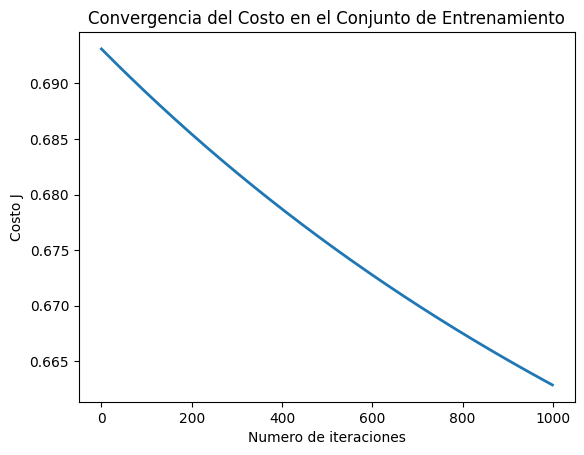

In [26]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente usando los datos de entrenamiento
theta = np.zeros(X_train_processed.shape[1]) # Inicializa theta con el tamaño correcto
theta, J_history = descensoGradiente(theta, X_train_processed, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Costo en el Conjunto de Entrenamiento')


# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# --- Evaluación del modelo en el conjunto de prueba completo ---

# Realiza predicciones en todo el conjunto de prueba
# La función sigmoid devuelve probabilidades, las convertimos a 0 o 1
predicciones = sigmoid(X_test_processed.dot(theta.T))
# Convierte las probabilidades a etiquetas binarias (0 o 1) usando un umbral de 0.5
y_pred = (predicciones >= 0.5).astype(int)

# Calcula la precisión del modelo
# Compara las predicciones (y_pred) con las etiquetas reales (y_test)
precision = np.mean(y_pred == y_test) * 100

print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}%')